In [1]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

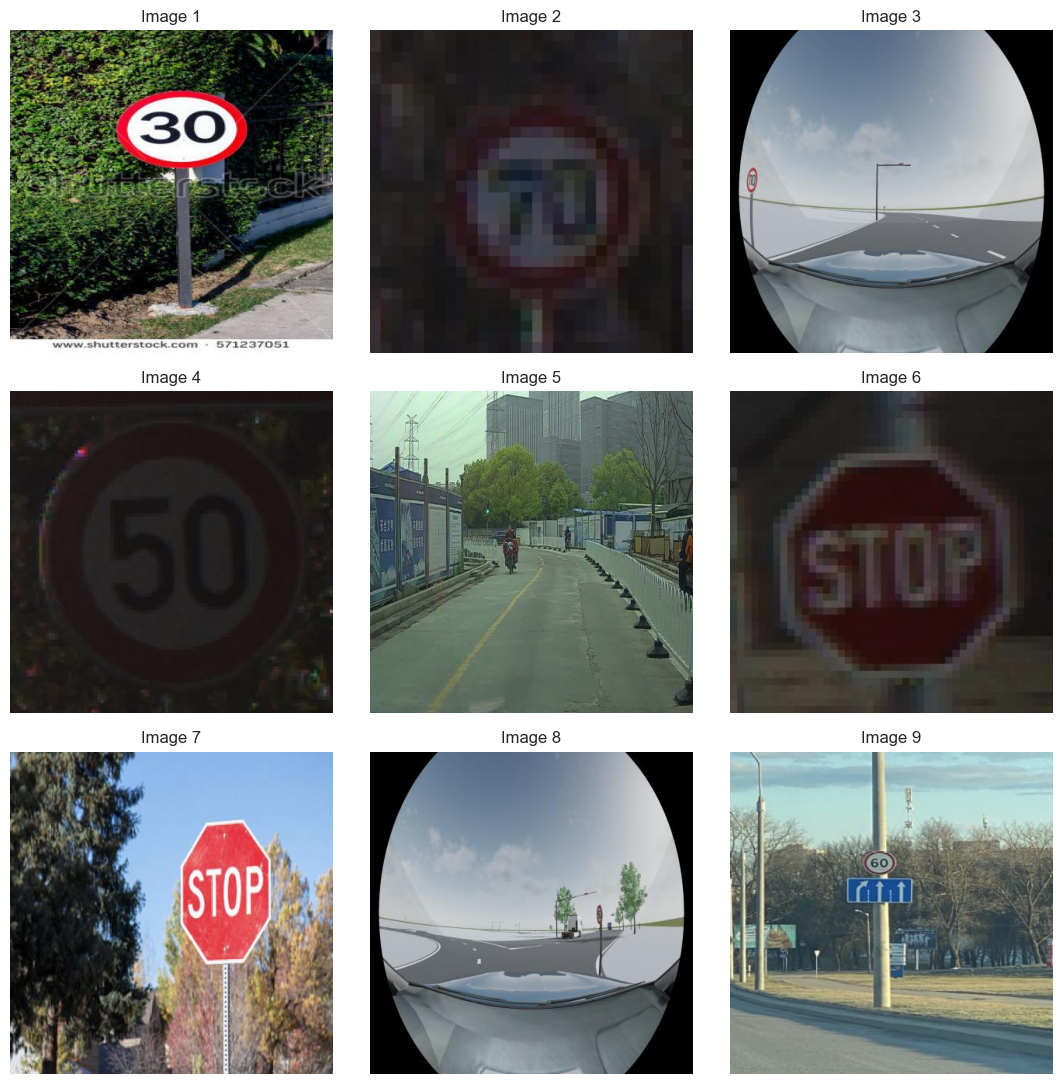

In [7]:
Image_dir = "traffic-signs-detection-data/car/train/images"
num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
image = cv2.imread("traffic-signs-detection-data/car/train/images/00000_00000_00001_png.rf.56c1f101f790944f14f215c7cad2a2b8.jpg")

h, w, c = image.shape
print(f" The Image has dimensions {w}x{h} and {c} channels")

 The Image has dimensions 416x416 and 3 channels



image 1/1 C:\Users\asrin\Desktop\bengaluru-mobility-challenge-2024\traffic-signs-detection-data\car\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 62.6ms
Speed: 0.0ms preprocess, 62.6ms inference, 254.8ms postprocess per image at shape (1, 3, 416, 416)


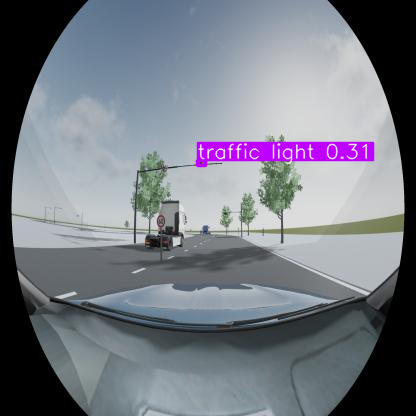

In [9]:
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "traffic-signs-detection-data/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')  

# Training The Final Model
result_final_model = final_model.train(data="traffic-signs-detection-data/car/data.yaml",epochs=30, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0)